In [706]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [736]:
from sklearn.datasets import load_iris
iris = load_iris()
# iris

In [708]:
# Récupération du csv et placement dans un dataframe
iris = pd.read_csv("C:\\Python39\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv")

In [709]:
# Ajouter les colonnes
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [710]:
# Visualiser dataframe
print(iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


In [711]:
# Mettre les vrais noms des Species / on définie que 0 = non virginica, 1 = virginica
iris.loc[(iris.Species == 0),'Species']=0
iris.loc[(iris.Species == 1),'Species']=0
iris.loc[(iris.Species == 2),'Species']=1

In [712]:
print(iris.to_string())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
5              5.4           3.9            1.7           0.4        0
6              4.6           3.4            1.4           0.3        0
7              5.0           3.4            1.5           0.2        0
8              4.4           2.9            1.4           0.2        0
9              4.9           3.1            1.5           0.1        0
10             5.4           3.7            1.5           0.2        0
11             4.8           3.4            1.6           0.2        0
12             4.8           3.0            1.4           0.1        0
13    

In [713]:
#iris.loc[iris['Species'] == 'virginica']

In [714]:
from sklearn.model_selection import train_test_split
x = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.3,random_state=42)

In [715]:
print(len(x_train), len(x_test), len(y_train), len(y_test))
# x_train = donnée sur laquelle je vais apprendre (ici 70%)
# x_test = donnée sur laquelle je vais prédire (ici 30%)
# y_train = résultat des données (ce que moi je donne, ici 0,1,2)
# y_test = résultat réelles que je vais comparer avec les classes prédites de mon modèle

105 45 105 45


In [716]:
from sklearn.svm import LinearSVC

# clf = svm.LinearSVC(random_state=0)
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)

# x, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                     LinearSVC(random_state=0, tol=1e-5))
clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [717]:
y_pred = cross_val_predict(clf, x_test, y_test)

In [718]:
print(y_pred)
print(len(y_pred))

[0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0]
45


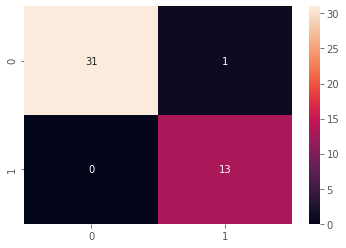

In [719]:
cnfm = confusion_matrix(y_test, y_pred)
sb.heatmap(cnfm, annot = True);
# print(metrics.confusion_matrix(y_test, y_pred))

In [720]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [721]:
precision = precision_score(y_test, y_pred)
print(precision)

0.9285714285714286


In [722]:
recall = recall_score(y_test, y_pred)
print(recall)

1.0


In [723]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.962962962962963


In [724]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [725]:
precision

array([0.92857143, 1.        ])

In [726]:
recall

array([1., 0.])

In [727]:
thresholds

array([1], dtype=int64)

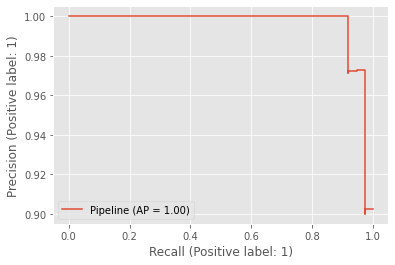

In [741]:
disp = plot_precision_recall_curve(clf, x_train, y_train)

In [740]:
roc_auc_score(y, clf.decision_function(x))

0.9985999999999999

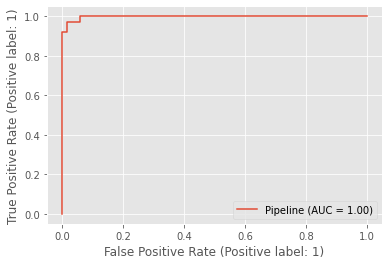

In [742]:
metrics.plot_roc_curve(clf, x_train, y_train)  
plt.show()